In [1]:
pip install finta

## Ridge and lasso regression for next day's closing stock price prediction

To set-up the problem, we construct features using the `finta` package.

[*********************100%***********************]  1 of 1 completed


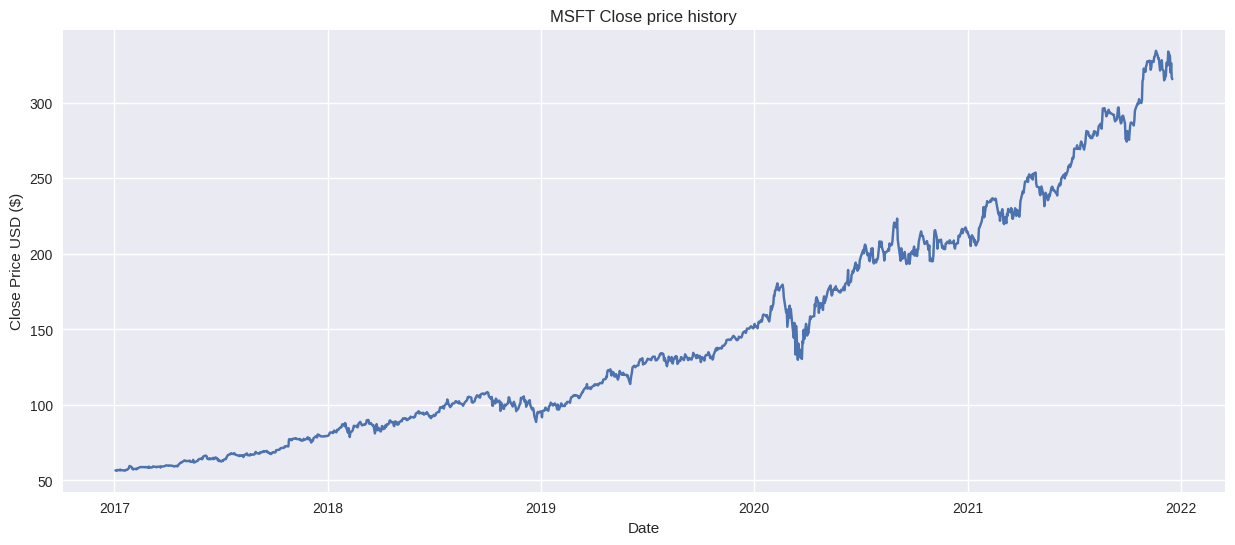

<ipython-input-8-71890df6a035>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TARGET'] = df['CLOSE'].shift(-1)
<ipython-input-8-71890df6a035>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.099e+04, tolerance: 1.718e+02
  model = cd_fast.enet_coordinate_descen

Ridge Regression RMSE: 3.57
Ridge Regression MAPE: 1.02%
Lasso Regression RMSE: 3.75
Lasso Regression MAPE: 1.08%


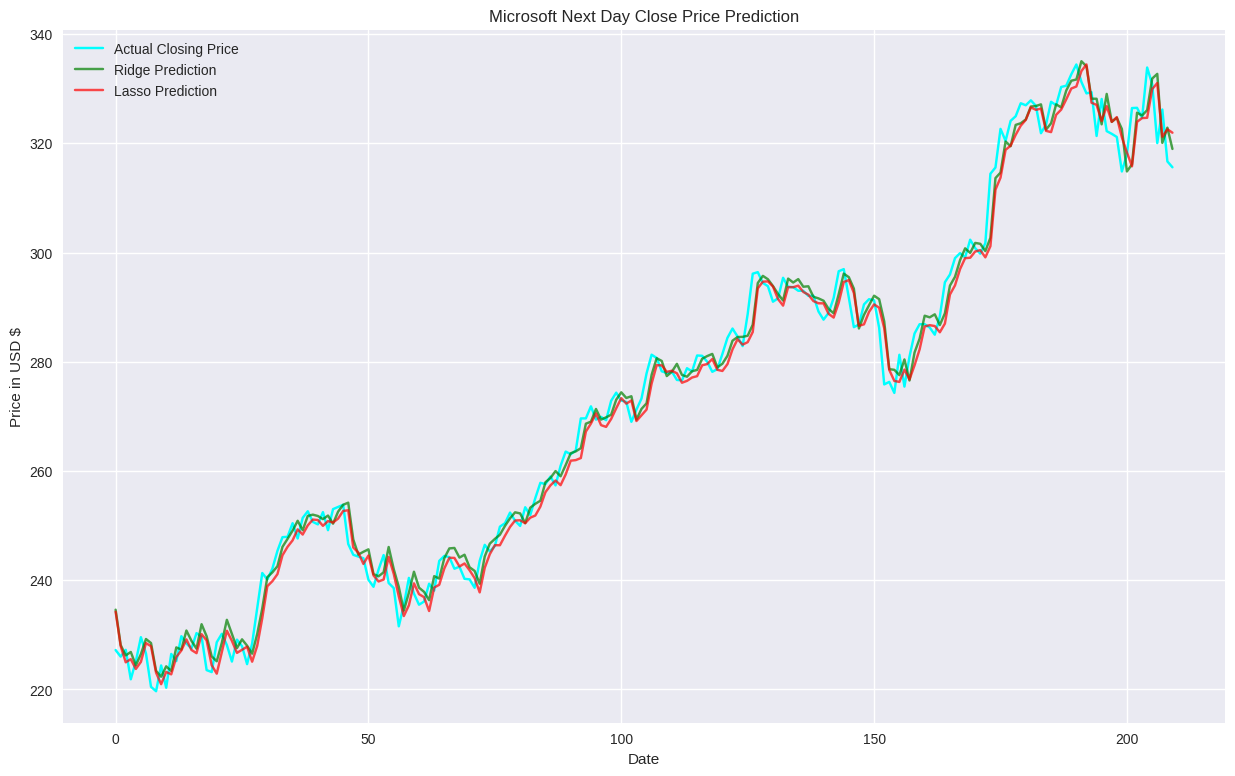

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finta import TA
import yfinance as yf
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

plt.style.use('seaborn-v0_8')

# Download MSFT stock data
stock = ['MSFT']
df = yf.download(stock, '2017-01-01', '2021-12-20')

# Plot Close price history
plt.figure(figsize=(15,6))
plt.title('MSFT Close price history')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

# Ensure column names are in uppercase
df.columns = [col[0].upper() if isinstance(col, tuple) else col.upper() for col in df.columns]

# Add technical indicators
df['SMA200'] = TA.SMA(df, 200)
df['RSI'] = TA.RSI(df)
df['ATR'] = TA.ATR(df)
df['BBWIDTH'] = TA.BBWIDTH(df)
df['WILLIAMS'] = TA.WILLIAMS(df)

# Drop the first 200 rows (due to SMA200 computation)
df = df.iloc[200:]

# Create the target variable (next day's Close price)
df['TARGET'] = df['CLOSE'].shift(-1)

# Drop any rows with NaN values
df.dropna(inplace=True)

# Train-test split
X = df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'SMA200', 'RSI', 'ATR', 'BBWIDTH', 'WILLIAMS']]
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Ridge Regression
ridge_model = Ridge(alpha=100)  # Regularization parameter
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Train Lasso Regression
lasso_model = Lasso(alpha=1)  # Regularization parameter
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Define MAPE function
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

# Compute error metrics
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mape = mape(y_test, ridge_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mape = mape(y_test, lasso_pred)

# Print results
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}")
print(f"Ridge Regression MAPE: {ridge_mape:.2f}%")
print(f"Lasso Regression RMSE: {lasso_rmse:.2f}")
print(f"Lasso Regression MAPE: {lasso_mape:.2f}%")

# Plot the results
plt.figure(figsize=(15, 9))
plt.title('Microsoft Next Day Close Price Prediction')
plt.plot(y_test.values, label="Actual Closing Price", color='cyan')
plt.plot(ridge_pred, label="Ridge Prediction", color='green', alpha=0.7)
plt.plot(lasso_pred, label="Lasso Prediction", color='red', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price in USD $')
plt.legend(loc="upper left")
plt.show()


## Ridge and lasso regression for next day's closing stock price prediction with CV

In the following code, we use the `GridSearchCV` function of the `sklearn.model_selection` module, which performs (automatically) cross validation for model selection (i.e., for hyperparameter tuning).

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.3013e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.48458e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.03763e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.48872e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/pytho

Best Ridge Alpha: 500
Ridge Regression RMSE: 3.56
Ridge Regression MAPE: 1.02%
Best Lasso Alpha: 1
Lasso Regression RMSE: 3.63
Lasso Regression MAPE: 1.05%


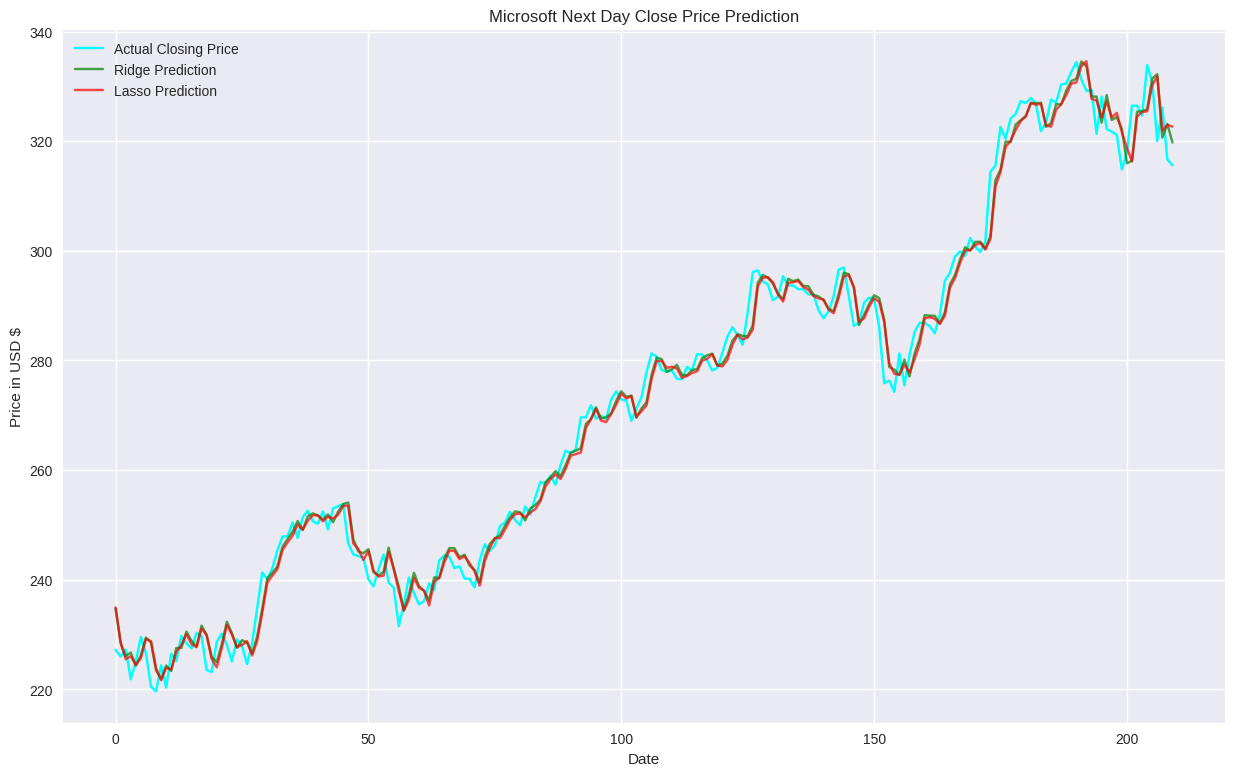

In [6]:
from sklearn.model_selection import GridSearchCV

plt.style.use('seaborn-v0_8')

# Download MSFT stock data
stock = ['MSFT']
df = yf.download(stock, '2017-01-01', '2021-12-20')

# Ensure column names are in uppercase
df.columns = [col[0].upper() if isinstance(col, tuple) else col.upper() for col in df.columns]

# Add technical indicators
df['SMA200'] = TA.SMA(df, 200)
df['RSI'] = TA.RSI(df)
df['ATR'] = TA.ATR(df)
df['BBWIDTH'] = TA.BBWIDTH(df)
df['WILLIAMS'] = TA.WILLIAMS(df)

# Drop the first 200 rows (due to SMA200 computation)
df = df.iloc[200:]

# Create the target variable (next day's Close price)
df['TARGET'] = df['CLOSE'].shift(-1)

# Drop any rows with NaN values
df.dropna(inplace=True)

# Train-test split
X = df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'SMA200', 'RSI', 'ATR', 'BBWIDTH', 'WILLIAMS']]
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define MAPE function
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

# Hyperparameter tuning for Ridge Regression
ridge_params = {'alpha': [0.01, 1, 10, 50, 100, 200, 500, 10000]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

# Train Ridge with best hyperparameter
ridge_pred = best_ridge.predict(X_test)

# Hyperparameter tuning for Lasso Regression
lasso_params = {'alpha': [0.01, 0.1, 1, 5, 10, 50, 100, 1000]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

# Train Lasso with best hyperparameter
lasso_pred = best_lasso.predict(X_test)

# Compute error metrics
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mape = mape(y_test, ridge_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mape = mape(y_test, lasso_pred)

# Print results
print(f"Best Ridge Alpha: {best_ridge.alpha}")
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}")
print(f"Ridge Regression MAPE: {ridge_mape:.2f}%")
print(f"Best Lasso Alpha: {best_lasso.alpha}")
print(f"Lasso Regression RMSE: {lasso_rmse:.2f}")
print(f"Lasso Regression MAPE: {lasso_mape:.2f}%")

# Plot the results
plt.figure(figsize=(15, 9))
plt.title('Microsoft Next Day Close Price Prediction')
plt.plot(y_test.values, label="Actual Closing Price", color='cyan')
plt.plot(ridge_pred, label="Ridge Prediction", color='green', alpha=0.7)
plt.plot(lasso_pred, label="Lasso Prediction", color='red', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price in USD $')
plt.legend(loc="upper left")
plt.show()
